<a href="https://www.kaggle.com/code/sahilr05/digit-recognizer-ml-dl-cnn?scriptVersionId=107018654" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


> Imoport Library

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical

In [3]:
data= pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test_data= pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

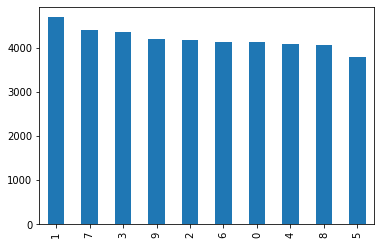

In [4]:
data["label"].value_counts().plot(kind="bar")

In [5]:
x = data.iloc[:,1:].values
y = data.iloc[:,:1]["label"]

In [6]:
x.shape ,y.shape

((42000, 784), (42000,))

In [7]:
x = x/255

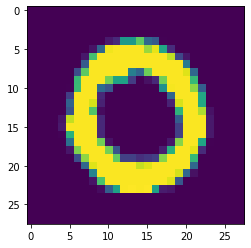

In [8]:
plt.imshow(x[1].reshape(28,28))

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test , y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=20,stratify=y)

In [10]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(x_train,y_train)
mnb.score(x_train,y_train) , mnb.score(x_test,y_test) 

(0.8243197278911565, 0.8248412698412698)

In [11]:
from sklearn.ensemble import RandomForestClassifier
rd = RandomForestClassifier()
rd.fit(x_train,y_train)
rd.score(x_train,y_train) , rd.score(x_test,y_test) 

(1.0, 0.9654761904761905)

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten, MaxPool2D, Conv2D,Dropout

In [13]:
model = Sequential(
        [
            Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape = (28,28,1)),
            Conv2D(32, kernel_size=(3, 3), activation='relu' ),
            MaxPool2D(pool_size=(2, 2)),
            Dropout(0.25),
        
            Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
            Conv2D(64, kernel_size=(3, 3), activation='relu' ),
            MaxPool2D(pool_size=(2, 2)),
            Dropout(0.25),
            
            Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same' ),
            Conv2D(128, kernel_size=(3, 3), activation='relu' ),
            MaxPool2D(pool_size=(2, 2)),
            Dropout(0.25),
        
            Flatten(),        
            Dense(256, activation='relu'),
            Dropout(0.5),
            Dense(10, activation = "softmax")
        ]
        )

2022-10-02 10:18:17.315624: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-02 10:18:17.414988: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-02 10:18:17.415772: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-02 10:18:17.417795: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [14]:
model.compile(optimizer="adam",loss=tf.keras.losses.sparse_categorical_crossentropy,metrics=["accuracy"])

In [15]:
x_train.shape,y_train.shape

((29400, 784), (29400,))

In [16]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [17]:
model.fit(x_train,y_train,epochs=2,validation_data=(x_test,y_test),)

2022-10-02 10:18:20.744623: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/2


2022-10-02 10:18:22.470024: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


919/919 [==============================] - 13s 6ms/step - loss: 0.3871 - accuracy: 0.8728 - val_loss: 0.0733 - val_accuracy: 0.9785
Epoch 2/2
919/919 [==============================] - 5s 5ms/step - loss: 0.0991 - accuracy: 0.9722 - val_loss: 0.0495 - val_accuracy: 0.9853


In [18]:
model.evaluate(x_train,y_train) , model.evaluate(x_test,y_test)

394/394 [==============================] - 1s 3ms/step - loss: 0.0495 - accuracy: 0.9853


([0.03597399219870567, 0.9894897937774658],
 [0.04952314496040344, 0.9853174686431885])